In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0, 0.5, 'Scores')

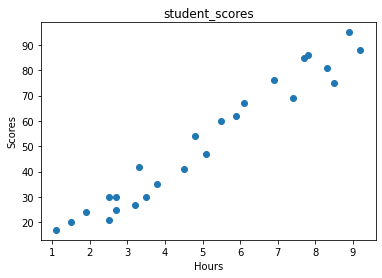

In [3]:
plt.scatter(df["Hours"], df["Scores"])
plt.title("student_scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

In [4]:
correlations = df.corr()
correlations

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [5]:
X = df["Hours"].values.reshape(-1, 1)
y = df["Scores"].values.reshape(-1, 1)

LinReg_1 = LinearRegression()
LinReg_1.fit(X,y)
print(LinReg_1.intercept_, LinReg_1.coef_)
print(LinReg_1.score(X, y))

[2.48367341] [[9.77580339]]
0.9529481969048356


In [6]:
x_train, x_test, y_train, y_test = train_test_split(df["Hours"].values, df["Scores"].values, test_size=0.3, random_state=24)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [7]:
LinReg_2 = LinearRegression()
LinReg_2.fit(x_train, y_train)
print(LinReg_2.intercept_, LinReg_2.coef_)
print(LinReg_2.score(x_train, y_train))

[-0.18565911] [[10.39441345]]
0.9498208107530551


In [8]:
y_pred = LinReg_2.predict(x_test)
pd.DataFrame({"Fact": y_test.reshape(-1), "Predicted": y_pred.reshape(-1)})

,Fact,Predicted
0,30,25.800375
1,88,95.442945
2,35,39.313112
3,20,15.405961
4,25,27.879257
5,81,86.087973
6,42,34.115905
7,69,76.733000


In [9]:
LinReg_2.score(x_test, y_test)

0.9458725234367678

In [10]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mae, mse, rmse)

5.516755744548048 33.60977997848205 5.797394240387836


In [11]:
LinReg_2.score(x_train, y_train)

0.9498208107530551

In [13]:
LinReg_2.score(x_test, y_test)

0.9458725234367678

In [14]:
y_pred = LinReg_1.predict(x_test)
pd.DataFrame({"Fact": y_test.reshape(-1), "Predicted": y_pred.reshape(-1)})

,Fact,Predicted
0,30,26.923182
1,88,92.421065
2,35,39.631726
3,20,17.147378
4,25,28.878343
5,81,83.622842
6,42,34.743825
7,69,74.824618


In [15]:
LinReg_1.score(x_test, y_test)

0.9663609339134319

In [16]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mae, mse, rmse)

4.320526066090551 20.887757598128346 4.5703126368037825
